In [10]:
# MIMIC-CXR Dataset with View Filtering
### This notebook demonstrates the use of the MIMIC-CXR dataset class with view filtering functionality in PyHealth.

In [ ]:
## 1. Setup and Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pip install pydicom
import pydicom
from pyhealth.datasets import MIMICCXRDataset

# Path to the MIMIC-CXR dataset
DATA_PATH = os.path.expanduser("~/test-mimic-cxr")

You should consider upgrading via the '/Users/jasleensandhu/pyhealth_env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [12]:
## 2. Loading the Dataset
# Load the dataset with all views
print("Loading dataset with all views...")
dataset = MIMICCXRDataset(root=DATA_PATH)
print("Dataset loaded successfully!")

# Read the metadata file
metadata_file = os.path.join(DATA_PATH, "mimic_cxr-metadata-pyhealth.csv")
df = pd.read_csv(metadata_file)
print(f"Total records: {len(df)}")

Loading dataset with all views...
No config path provided, using default config
Initializing mimic_cxr dataset from /Users/jasleensandhu/test-mimic-cxr (dev mode: False)
Scanning table: mimic_cxr from /Users/jasleensandhu/test-mimic-cxr/mimic_cxr-metadata-pyhealth.csv
Dataset loaded successfully!
Total records: 8


View distribution:
AP         4
PA         2
LATERAL    2
Name: view_position, dtype: int64


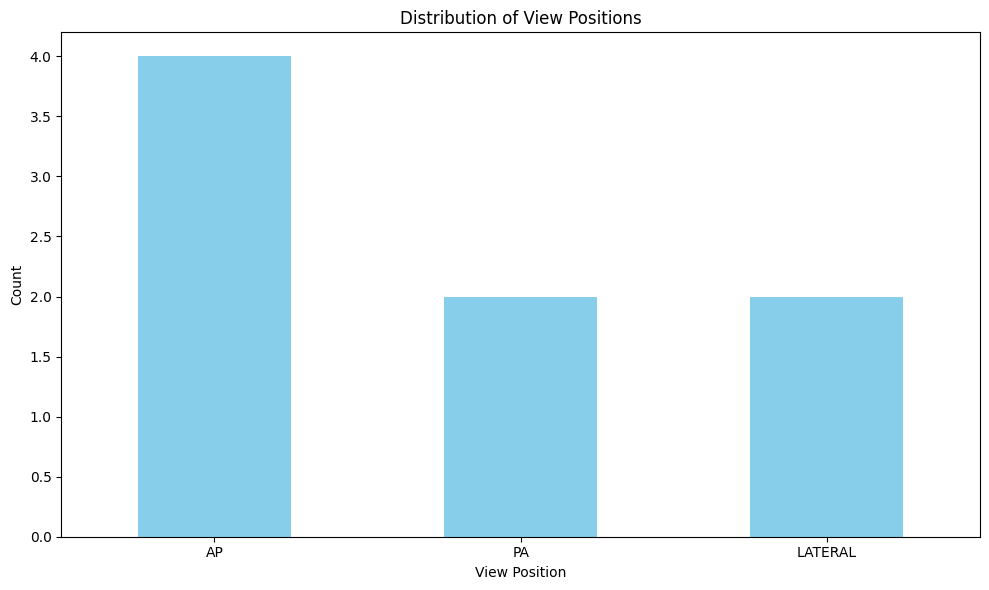

In [13]:
## 3. View Distribution
# Get view distribution
view_counts = df['view_position'].value_counts()
print(f"View distribution:\n{view_counts}")

# Visualize the distribution
plt.figure(figsize=(10, 6))
view_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of View Positions')
plt.xlabel('View Position')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [14]:
## 4. Filtering by View Position
# Get available views
available_views = df['view_position'].unique()
print(f"Available views: {list(available_views)}")

# Choose a view to filter by
if len(available_views) > 0:
    test_view = available_views[0]  # Use the first available view
    
    # Load the dataset with only the selected view
    print(f"\nLoading dataset with only {test_view} views...")
    filtered_dataset = MIMICCXRDataset(
        root=DATA_PATH,
        views=[test_view]
    )
    
    # Read the filtered metadata file
    filtered_metadata_file = os.path.join(DATA_PATH, f"mimic_cxr-metadata-pyhealth-{test_view}.csv")
    filtered_df = pd.read_csv(filtered_metadata_file)
    
    # Display filtered statistics
    print(f"Filtered records: {len(filtered_df)}")
    
    # Verify filtering worked correctly
    filtered_view_counts = filtered_df['view_position'].value_counts()
    print(f"\nFiltered view distribution:\n{filtered_view_counts}")

Available views: ['PA', 'LATERAL', 'AP']

Loading dataset with only PA views...
No config path provided, using default config
Initializing mimic_cxr dataset from /Users/jasleensandhu/test-mimic-cxr (dev mode: False)
Scanning table: mimic_cxr from /Users/jasleensandhu/test-mimic-cxr/mimic_cxr-metadata-pyhealth.csv
Filtered records: 2

Filtered view distribution:
PA    2
Name: view_position, dtype: int64


In [15]:
## 5. Visualizing Sample Images
def display_dicom(dicom_path, title=None):
    """Load and display a DICOM image."""
    try:
        # Read DICOM file
        dcm = pydicom.dcmread(dicom_path)
        
        # Convert to image
        pixel_array = dcm.pixel_array
        
        # Get view position
        view_position = dcm.ViewPosition if hasattr(dcm, 'ViewPosition') else "Unknown"
        
        # Display image
        plt.figure(figsize=(8, 8))
        plt.imshow(pixel_array, cmap='gray')
        plt.title(title or f"{view_position} View")
        plt.axis('off')
        plt.show()
        
        return view_position
    except Exception as e:
        print(f"Error displaying DICOM: {e}")
        return None


PA View Sample:
Patient ID: 10000032
Study ID: 50414267


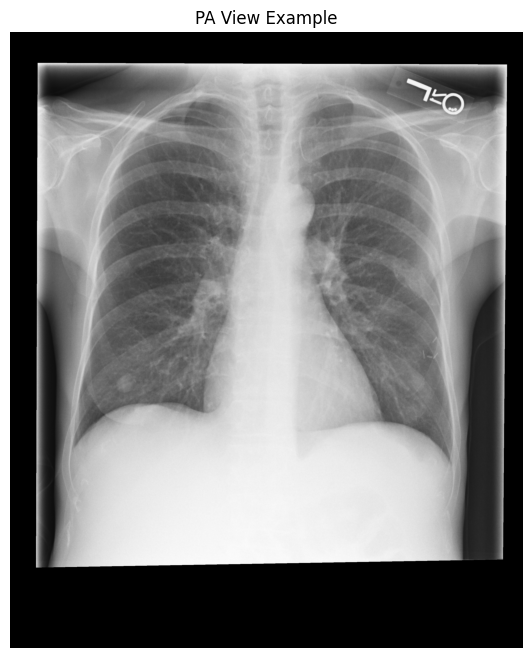


LATERAL View Sample:
Patient ID: 10000032
Study ID: 50414267


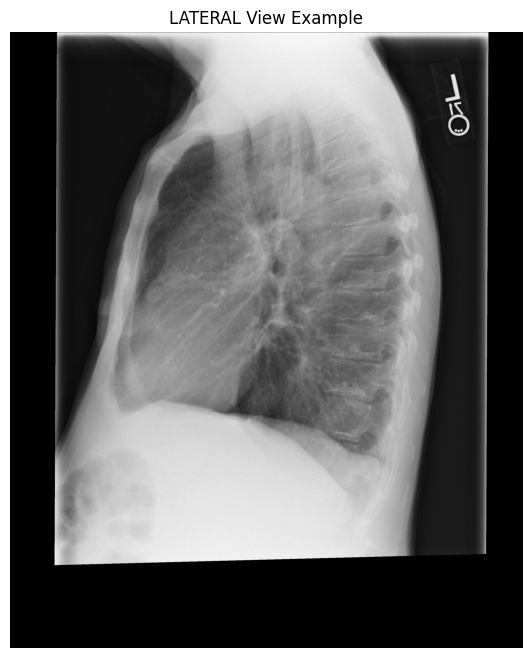


AP View Sample:
Patient ID: 10000032
Study ID: 53911762


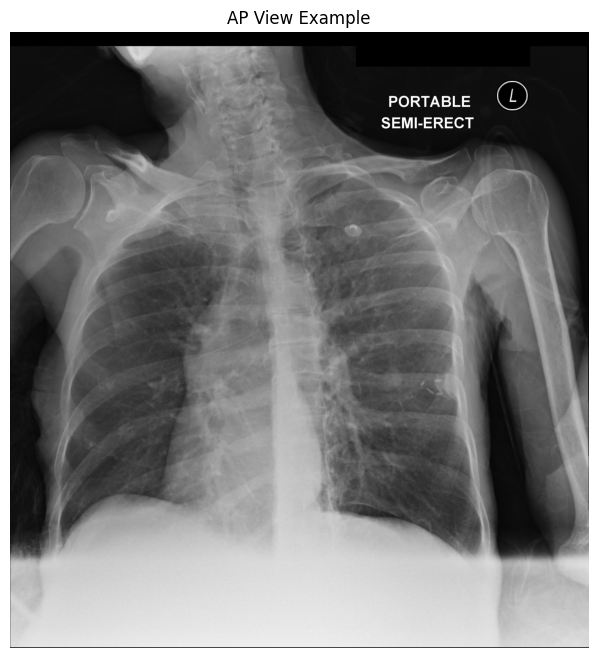

In [16]:
# Display one sample from each available view (if possible)
for view in available_views:
    # Get a sample with this view
    view_samples = df[df['view_position'] == view]
    if len(view_samples) > 0:
        sample_row = view_samples.iloc[0]
        
        print(f"\n{view} View Sample:")
        print(f"Patient ID: {sample_row['subject_id']}")
        print(f"Study ID: {sample_row['study_id']}")
        
        # Display the image
        display_dicom(sample_row['path'], f"{view} View Example")